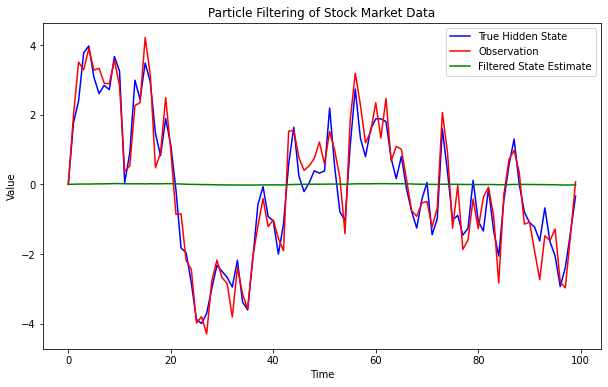

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate simulated data
np.random.seed(0)
T = 100  # Number of time steps
dt = 1.0  # Time step size
hidden_state = np.zeros((T,))
observation = np.zeros((T,))

# Simulate true hidden state and noisy observations
for t in range(1, T):
    hidden_state[t] = 0.8 * hidden_state[t-1] + np.random.randn()
    observation[t] = hidden_state[t] + 0.5 * np.random.randn()

# Particle filtering
# Initialize parameters
num_particles = 100  # Number of particles
Q = 1e-5  # Process noise covariance
R = 0.1**2  # Measurement noise covariance

# Initialize particles
particles = np.zeros((T, num_particles))
weights = np.ones((T, num_particles)) / num_particles

for t in range(1, T):
    # Prediction step
    particles[t] = 0.8 * particles[t-1] + np.sqrt(Q) * np.random.randn(num_particles)

    # Update step
    innovation = observation[t] - particles[t]
    likelihood = np.exp(-0.5 * (innovation**2) / R)
    weights[t] = weights[t-1] * likelihood
    weights_sum = np.sum(weights[t])
    if weights_sum > 0:
        weights[t] /= weights_sum
    else:
        weights[t] = np.ones((num_particles,)) / num_particles


    # Resampling step
    indices = np.random.choice(np.arange(num_particles), size=num_particles, replace=True, p=weights[t])
    particles[t] = particles[t, indices]
    weights[t] = np.ones((num_particles,)) / num_particles

# Compute filtered state estimate
filtered_state = np.sum(particles * weights, axis=1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hidden_state, color='b', label='True Hidden State')
plt.plot(observation, color='r', label='Observation')
plt.plot(filtered_state, color='g', label='Filtered State Estimate')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Particle Filtering of Stock Market Data')
plt.show()
